# Neural Networks

Neural Networks are similar to Perceptrons, but much more powerful — they have multiple layers and multiple nodes. They consist of layers of interconn222ected nodes (called neurons), each performing a simple computation and passing the result forward. By stacking many layers, neural networks can learn patterns from feature data.



![Neural Network Diagram](Neural-Networks-Architecture.png)

(From GeeksForGeeks.org)

## Basic Components

1. **Neurons**:  
   Each neuron takes one or more inputs and produces an output. A neuron typically:
   - Multiplies each input by a corresponding weight.
   - Sums all these weighted inputs together and adds a bias term.
   - Passes this sum through a nonlinear activation function (e.g., ReLU, sigmoid) to produce the neuron’s output.

2. **Layers**:  
   Neurons are arranged in layers:
   - **Input Layer**: Receives the raw data.
   - **Hidden Layers**: One or more layers that process intermediate representations. Deeper networks (with more hidden layers) can extract more complex features.
   - **Output Layer**: Produces the final prediction or classification score.

3. **Weights and Biases**:  
   The learnable parameters of a neural network are the weights and biases. During training, these parameters are iteratively adjusted to minimize a chosen loss function, thereby improving the model’s performance.

## Math of Neural Networks: Linear Transformations and Nonlinearities

A single layer of neurons without activation functions can be viewed as a linear transformation. Consider one layer with:
- Input vector $ \mathbf{x} $ of shape $ (n,) $
- Weight matrix $ \mathbf{W} $ of shape $ (m \times n) $
- Bias vector $ \mathbf{b} $ of shape $ (m,) $

The computation for the layer’s output $ \mathbf{z} $ (also known as the pre-activation) is:
$$
\mathbf{z} = \mathbf{W}\mathbf{x} + \mathbf{b}
$$

In matrix form, if you have a batch of inputs $ \mathbf{X} $ of shape $ (N \times n) $, where $ N $ is the batch size, the output for the entire batch is:
$$
\mathbf{Z} = \mathbf{X}\mathbf{W}^T + \mathbf{b}
$$
Here $ \mathbf{Z} $ has shape $ (N \times m) $.

After computing $ \mathbf{z} $, we apply a nonlinear activation function $ \sigma(\cdot) $, resulting in the final output $ \mathbf{a} $:
$$
\mathbf{a} = \sigma(\mathbf{z})
$$

There are many activation functions, but we will mostly consider the sigmoid function:
- **Sigmoid**: $ \sigma(z) = \frac{1}{1 + e^{-z}} $

Some others include:
- **ReLU**: $ \sigma(z) = \max(0, z) $
- **Tanh**: $ \sigma(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}} $

## Multiple Layers and Deep Architectures

By stacking multiple layers of the form:
$$
\mathbf{a}^{(1)} = \sigma(\mathbf{W}^{(1)}\mathbf{x} + \mathbf{b}^{(1)})
$$
$$
\mathbf{a}^{(2)} = \sigma(\mathbf{W}^{(2)}\mathbf{a}^{(1)} + \mathbf{b}^{(2)})
$$
$$
\ldots
$$
$$
\mathbf{a}^{(L)} = \sigma(\mathbf{W}^{(L)}\mathbf{a}^{(L-1)} + \mathbf{b}^{(L)})
$$

we can approximate functions that are NOT LINEAR!!

## Training: Adjusting Parameters via Gradient Descent

Training a neural network involves:
1. **Forward Pass**: Compute predictions for given inputs.
2. **Loss Computation**: Compare predictions with true labels to obtain a loss value.
3. **Backward Pass (Backpropagation)**: Compute the gradients of the loss with respect to each weight and bias.
4. **Update Parameters**: Adjust weights and biases in the direction that reduces the loss (often using gradient descent or more sophisticated optimizers like Adam).

Over epochs, the network parameters are refined and the error generally decreases. 

### Be Careful!
One thing about Neural Networks is that you don't want to overfit the data; if you keep the model learning, it will learn the entire dataset since it is able to reproduce nonlinear functions.

---



You can use pretty much any cost function for Neural Networks, but here we will consider the MSE cost function.

## Stochastic Gradient Descent

The steps for Stochastic Gradient Descent in Neural Networks works using backward propogation to find all the errors:

**Definitions**
- $L = $ # of layers
- $\ell = $ layer 
- $w = $ weight
- $b  = $ bias
- $\delta = $ error
- $\sigma = $ the sigmoid function
- $\mathbf{z} = $ pre-activation vector (the result of a linear transformation applied to the input data or the output from the previous layer)
- $\mathbf{a} = $ post-activation vector (the result of applying the non-linear activation function $\sigma(\cdot)$ — or whichever activation function you are using — to the pre-activation vector)
- $\hat{y}^{(i)} = $ our output vector

**Initialize.** Given a feature vector $ x^{(i)} $, let $ a^0 = x^{(i)} $.

**Feedforward.** For $\ell = 1,\ldots,L$:
$
z^\ell = w^\ell a^{\ell-1} + b^\ell \quad \text{and} \quad a^\ell = \sigma(z^\ell).
$

**Output error.** Compute:
$
\delta^L = \nabla_a C \otimes \sigma'(z^L).
$

**Backpropagate.** For $\ell = L-1,\ldots,1$:
$
\delta^\ell = ((w^{\ell+1})^T \delta^{\ell+1}) \otimes \sigma'(z^\ell).
$

**Update gradient.** For $\ell = L,L-1,\ldots,1$:
$
w^\ell \leftarrow w^\ell - a \delta^\ell (a^{\ell-1})^T,
$
$
b^\ell \leftarrow b^\ell - a \delta^\ell.
$


In [268]:
## Convert Data into Grayscale Matrices for Pixel Values

In [269]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

root_dir = 'faces_4'
HEIGHT = 30
WIDTH = 32

image_arrays = []
labels_userid = []
labels_pose = []
labels_expression = []
labels_eyes = []

# Load images and extract labels
for subdir, dirs, files in os.walk(root_dir):
    for file_name in files:
        if file_name.endswith('.pgm'):
            # Parse labels from the filename
            parts = file_name.split('_')
            userid = parts[0]
            pose = parts[1]
            expression = parts[2]
            eyes = parts[3]
            # scale_with_ext = parts[4] # Not needed if all are scale=4

            img_path = os.path.join(subdir, file_name)
            with Image.open(img_path).convert('L') as img:
                arr = np.array(img, dtype=np.float32)

                # Optional: Ensure correct size by resizing if needed.
                # img = img.resize((WIDTH, HEIGHT), Image.ANTIALIAS)
                # arr = np.array(img, dtype=np.float32)

                if arr.shape == (HEIGHT, WIDTH):
                    image_arrays.append(arr)
                    labels_userid.append(userid)
                    labels_pose.append(pose)
                    labels_expression.append(expression)
                    labels_eyes.append(eyes)
                else:
                    print(f"Skipping {file_name} due to incorrect size {arr.shape}")


# Convert image list to numpy array
data_array = np.stack(image_arrays, axis=0)  # Shape: (M, 32, 30)



In [270]:
import numpy as np
from sklearn.model_selection import train_test_split

# data_array: shape (M, 32, 30)
data_array = np.load('data_array.npy')

# Suppose you have a labels array of shape (M,)
# Each element corresponds to a label for the respective image in data_array.
# This might be constructed beforehand from filenames or directories:
# labels = ... # e.g. a numpy array like np.array([0, 1, 0, 2, ...]) of length M

# For demonstration, let's assume you already have it:
labels = list(zip(labels_userid, labels_pose, labels_expression, labels_eyes))

# Split the data into train and test sets
train_X, test_X, train_y, test_y = train_test_split(
    data_array, 
    labels, 
    test_size=0.2,     # 20% of data goes to test set
    random_state=42     # For reproducibility
)

print("Training Data Shape (X):", train_X.shape) # (M_train, 32, 30)
print("Training Labels Shape (y):", np.array(train_y).shape) 
print("Test Data Shape (X):", test_X.shape)       # (M_test, 32, 30)
print("Test Labels Shape (y):", np.array(test_y).shape)

print(train_X[0])
for i in range(len(train_X)):
    print(f"Image {i}: Max value = {np.max(train_X[i])}, Min value = {np.min(train_X[i])}")


Training Data Shape (X): (499, 30, 32)
Training Labels Shape (y): (499, 4)
Test Data Shape (X): (125, 30, 32)
Test Labels Shape (y): (125, 4)
[[ 68.  65.  61.  58.  55.  51.  48.  45.  43.  36.  38.  38.  48.  43.
   33.  31.  36.  43.  45.  48.  51.  53.  56.  60.  63.  65.  68.  70.
   71.  71.  71.  71.]
 [ 68.  65.  61.  60.  56.  53.  50.  48.  45.  43.  46.  43.  50.  46.
   43.  36.  45.  50.  51.  53.  56.  58.  61.  65.  66.  66.  70.  70.
   71.  71.  73.  73.]
 [ 68.  66.  63.  61.  58.  55.  51.  50.  48.  46.  51.  48.  48.  51.
   48.  43.  51.  55.  56.  58.  60.  61.  63.  65.  66.  68.  70.  71.
   71.  73.  73.  73.]
 [ 70.  66.  65.  63.  60.  56.  55.  53.  50.  48.  56.  51.  51.  55.
   53.  50.  56.  58.  60.  61.  63.  63.  66.  68.  70.  73.  73.  73.
   73.  73.  75.  75.]
 [ 70.  68.  66.  65.  61.  60.  58.  55.  53.  51.  60.  55.  55.  58.
   56.  58.  65.  63.  63.  63.  66.  68.  68.  71.  73.  75.  73.  75.
   75.  75.  75.  75.]
 [ 71.  68.  66.  66.  

The training and testing features are stored in the variables train_X and test_X, and each image is represented as a (1 x 30 x 32) array. Since there are 4 labels (classifications), the training and testing labels label each image with a (1 x 4) array.

## Image Flattening

Now, we need to flatten each 30 x 32 grayscale vector for each image. This will turn the matrix describing the image's pixels into a 960 column vector.

## One-Hot Encoding

We will take each column vector and turn it into 1's and 0's by rounding each grayscale value up to 1 if it's closer to 1 and 0 if it's closer to 0.

In [271]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical  

# 1. Convert pixel values to binary (0 or 1)
# Threshold at 128: above 128 = 1, else = 0
binary_data = (data_array > 128).astype(np.float32) 

# 2. Flatten each image
M = binary_data.shape[0]
flattened_data = binary_data.reshape(M, -1)  # (M, 960)

# Encode each label set from strings to integers
encoder_userid = LabelEncoder()
encoder_pose = LabelEncoder()
encoder_expression = LabelEncoder()
encoder_eyes = LabelEncoder()

int_userid = encoder_userid.fit_transform(labels_userid)
int_pose = encoder_pose.fit_transform(labels_pose)
int_expression = encoder_expression.fit_transform(labels_expression)
int_eyes = encoder_eyes.fit_transform(labels_eyes)

# One-hot encode each integer label array
userid_oh = to_categorical(int_userid, num_classes=len(encoder_userid.classes_))
pose_oh = to_categorical(int_pose, num_classes=len(encoder_pose.classes_))
expression_oh = to_categorical(int_expression, num_classes=len(encoder_expression.classes_))
eyes_oh = to_categorical(int_eyes, num_classes=len(encoder_eyes.classes_))


# # For example, if you only want to predict the pose:
# labels = int_pose  # integer labels
# labels_oh = pose_oh  # one-hot labels

# Split into train and test sets using the chosen label set
train_X, test_X, train_y, test_y = train_test_split(
    flattened_data, 
    labels_oh,     # Use one set of one-hot labels for your task
    test_size=0.2, 
    random_state=42
)

print("Train X shape:", train_X.shape)      # (M_train, 960)
print("Train y shape:", train_y.shape)      # (M_train, num_poses)
print("Test X shape:", test_X.shape)        # (M_test, 960)
print("Test y shape:", test_y.shape)        # (M_test, num_poses)



Train X shape: (499, 960)
Train y shape: (499, 4)
Test X shape: (125, 960)
Test y shape: (125, 4)


In [272]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def initialize_weights_and_biases(layers=[960, 100, 100, 4]):
    weights = []
    biases = []
    for i in range(len(layers) - 1):
        w = np.random.randn(layers[i], layers[i+1])
        b = np.random.randn(layers[i+1], 1)
        weights.append(w)
        biases.append(b)
    return weights, biases

W, B = initialize_weights_and_biases()

xi = train_X[0].reshape(-1, 1)  # Shape: (960, 1)
yi = train_y[0].reshape(-1, 1)  # Shape: (4, 1)
a0 = xi

print("Input shape:", a0.shape)

z1 = W[0].T @ a0 + B[0]  # Shape: (100, 1)
a1 = sigmoid(z1)

print(f"np.shape(W[0].T): {np.shape(W[0].T)}")
print(f"np.shape(a1): {np.shape(a1)}")
print(f"np.shape(z1): {np.shape(z1)}")

z2 = W[1].T @ a1 + B[1]  # Shape: (100, 1)
a2 = sigmoid(z2)

print(f"np.shape(W[1].T): {np.shape(W[1].T)}")
print(f"np.shape(a2): {np.shape(a2)}")
print(f"np.shape(z2): {np.shape(z2)}")


z3 = W[2].T @ a2 + B[2]  # Shape: (100, 1)
a3 = sigmoid(z3)
y_hat = a3

print(f"np.shape(W[2].T): {np.shape(W[2].T)}")
print(f"np.shape(a3): {np.shape(a3)}")
print(f"np.shape(z3): {np.shape(z3)}")

print(f"prediction: np.argmax(y_hat): {np.argmax(y_hat)}")
print(f"true label: np.argmax(yi): {np.argmax(yi)}")
print(f"mse(yi, y_hat): {mse(yi, y_hat)}")




Input shape: (960, 1)
np.shape(W[0].T): (100, 960)
np.shape(a1): (100, 1)
np.shape(z1): (100, 1)
np.shape(W[1].T): (100, 100)
np.shape(a2): (100, 1)
np.shape(z2): (100, 1)
np.shape(W[2].T): (4, 100)
np.shape(a3): (4, 1)
np.shape(z3): (4, 1)
prediction: np.argmax(y_hat): 2
true label: np.argmax(yi): 2
mse(yi, y_hat): 0.42619516176144756


## Backpropogation

**Backpropagation** is a key algorithm used for training neural networks. It involves computing the gradient of the loss function with respect to each weight by the chain rule, and then updating the weights to minimize the loss. Here, we explain the backpropagation process as defined in the provided `NeuralNetwork` class.

## Forward Pass

During the forward pass, the input $ x $ is propagated through the network to compute the output $ \hat{y} $. This involves computing the pre-activation ($ z $) and post-activation ($ a $) values for each layer using the weights and biases. We already talked about this a little.

## Backward Pass

Here are the steps for the backward pass:

1. **Compute the Gradient of the Loss with Respect to the Output ($ dJ_{da} $)**:

   $$
   dJ_{da} = 2 \cdot (\hat{y} - y_{\text{true}})
   $$

   Here, $ \hat{y} $ is the predicted output, and $ y_{\text{true}} $ is the true label.

2. **Compute the Gradient of the Activation Function ($ da_{dz} $)**:

   $$
   da_{dz} = \sigma'(z)
   $$

   where $ \sigma'(z) $ is the derivative of the sigmoid function:

   $$
   \sigma'(z) = \sigma(z) \cdot (1 - \sigma(z))
   $$

3. **Compute the Gradient of the Loss with Respect to the Pre-Activation ($ dJ_{dz} $)**:

   $$
   dJ_{dz} = dJ_{da} \cdot da_{dz}
   $$

4. **Compute the Gradient of the Loss with Respect to the Weights and Biases**:

   For the last layer:

   $$
   dJ_{dw} = a_{\text{prev}} \cdot dJ_{dz}^T
   $$

   $$
   dJ_{db} = dJ_{dz}
   $$

   Here, $ a_{\text{prev}} $ is the activation from the previous layer.

5. **Update the Weights and Biases**:

   $$
   W = W - \eta \cdot dJ_{dw}
   $$

   $$
   b = b - \eta \cdot dJ_{db}
   $$

   where $ \eta $ is the learning rate.

6. **Repeat for All Layers**:

   For each layer, starting from the last layer and moving backward, repeat steps 1-5. The gradient of the loss with respect to the activation of the previous layer ($ dJ_{da} $) is computed using the weights of the current layer:

   $$
   dJ_{da} = W_{\text{next}} \cdot dJ_{dz}
   $$


Time to implement the Backpropogation. We will define a class for our NerualNetwork and define backward, forward, and training functions for this step. For neatness, let's put all of our previous functions in this class too.


In [273]:
import numpy as np

class NeuralNetwork(object):
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.weights, self.biases = self.initialize_weights_and_biases()
        
    def initialize_weights_and_biases(self):
        sizes = [self.input_size] + self.hidden_sizes + [self.output_size]
        weights = []
        biases = []
        for i in range(len(sizes) - 1):
            w = np.random.randn(sizes[i], sizes[i+1])
            b = np.random.randn(sizes[i+1], 1)
            weights.append(w)
            biases.append(b)
        return weights, biases
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)
    
    def forward(self, x):
        a = x
        self.activations = [a]
        self.z_values = []
        for i in range(len(self.weights)):
            z = self.weights[i].T @ a + self.biases[i]
            self.z_values.append(z)
            a = self.sigmoid(z)
            self.activations.append(a)
        return a
    
    def backward(self, y_true, y_pred, lr=0.01):
        dJ_da = 2 * (y_pred - y_true)
        da_dz = self.sigmoid_derivative(self.z_values[-1])
        dJ_dz = dJ_da * da_dz
        
        dJ_dw = self.activations[-2] @ dJ_dz.T
        dJ_db = dJ_dz
        self.weights[-1] -= lr * dJ_dw
        self.biases[-1] -= lr * dJ_db
        
        for i in range(len(self.weights)-2, -1, -1):
            dJ_da = self.weights[i+1] @ dJ_dz
            da_dz = self.sigmoid_derivative(self.z_values[i])
            dJ_dz = dJ_da * da_dz
            
            dJ_dw = self.activations[i] @ dJ_dz.T
            dJ_db = dJ_dz
            self.weights[i] -= lr * dJ_dw
            self.biases[i] -= lr * dJ_db
    
    def train(self, X, y, epochs=10, lr=0.01):
        self.errors = []
        for epoch in range(epochs):
            total_loss = 0
            for i in range(len(X)):
                xi = X[i].reshape(-1, 1)
                yi = y[i].reshape(-1, 1)
                y_hat = self.forward(xi)
                self.backward(yi, y_hat, lr)
                loss = self.mse(yi, y_hat)
                total_loss += loss
            
            avg_loss = total_loss / len(X)
            self.errors.append(avg_loss)
            
            # Print only every 10 epochs
            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss}")

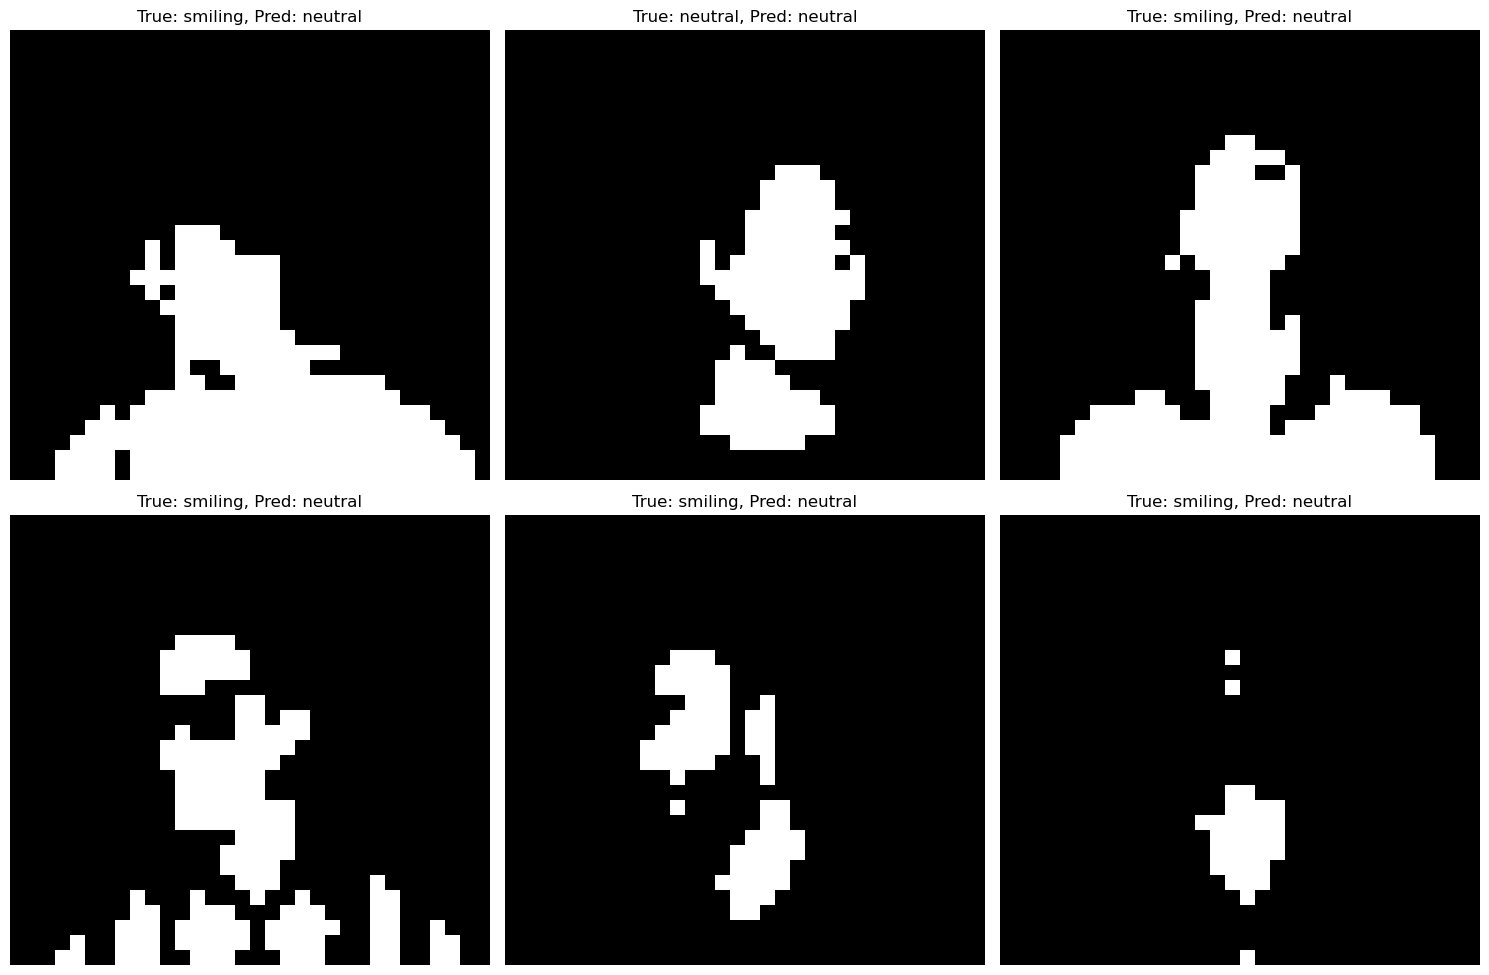

In [274]:
import random

import matplotlib.pyplot as plt
from math import sqrt

# Create an instance of the NeuralNetwork class
nn = NeuralNetwork(input_size=960, hidden_sizes=[100, 100], output_size=4)

# Select 6 random items from the test set
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for ax in axes:
    random_index = random.randint(0, len(test_X) - 1)
    random_input = test_X[random_index].reshape(-1, 1)
    random_label = test_y[random_index].reshape(-1, 1)

    # Make a prediction
    random_prediction = nn.forward(random_input)

    # Calculate the MSE
    prediction_mse = nn.mse(random_label, random_prediction)

    # Visualize the input image and the prediction
    true_label_str = "neutral" if np.argmax(random_label) == 0 else "smiling"
    predicted_label_str = "neutral" if np.argmax(random_prediction) == 0 else "smiling"

    ax.imshow(random_input.reshape(HEIGHT, WIDTH), cmap='gray')
    ax.set_title(f"True: {true_label_str}, Pred: {predicted_label_str}")
    ax.axis('off')

plt.tight_layout()
plt.show()

### Result of Random Classification

These photos are classified randomly, so it makes sense that our model is pretty inaccurate.

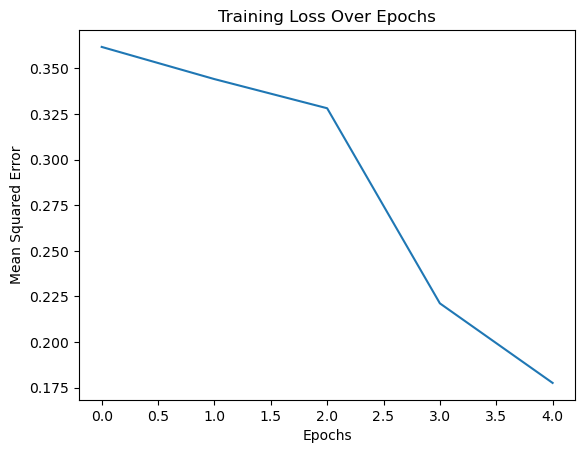

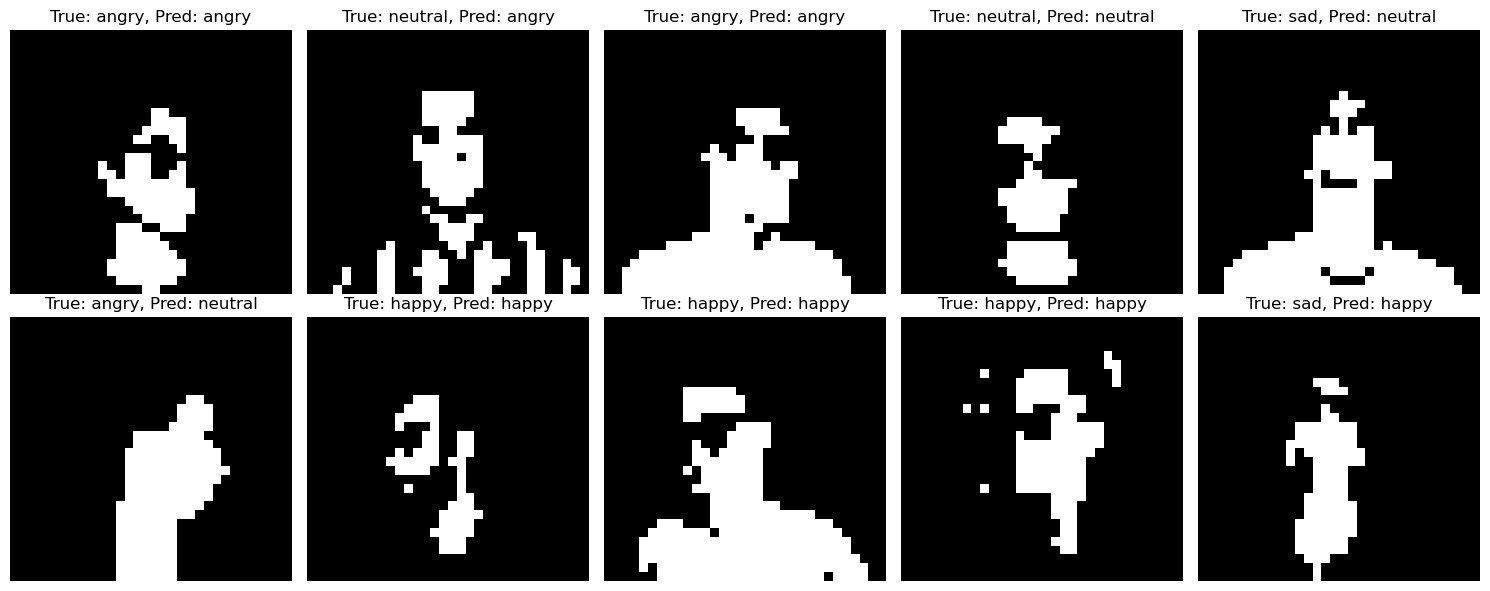

Prediction: [0.00687547 0.25279415 0.16070774 0.00135403]
True Label: [0. 0. 0. 1.]
MSE: 0.13400916832366883


In [275]:
# Train the neural network
nn.train(train_X, train_y, epochs=5, lr=0.01)

# Visualize the training loss over epochs
plt.plot(nn.errors)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss Over Epochs')
plt.show()

# Select a random item from the test set
random_index = random.randint(0, len(test_X) - 1)
random_input = test_X[random_index].reshape(-1, 1)
random_label = test_y[random_index].reshape(-1, 1)

# Make a prediction
random_prediction = nn.forward(random_input)

# Calculate the MSE
prediction_mse = nn.mse(random_label, random_prediction)

# Visualize 10 random items from the test set
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for ax in axes:
    random_index = random.randint(1, len(test_X))
    random_input = test_X[random_index].reshape(-1, 1)
    random_label = test_y[random_index].reshape(-1, 1)
    random_prediction = nn.forward(random_input)
    
    true_label = np.argmax(random_label)
    predicted_label = np.argmax(random_prediction)
    
    true_label_str = encoder_expression.inverse_transform([true_label])[0]
    predicted_label_str = encoder_expression.inverse_transform([predicted_label])[0]
    
    ax.imshow(random_input.reshape(HEIGHT, WIDTH), cmap='gray')
    ax.set_title(f"True: {true_label_str}, Pred: {predicted_label_str}")
    ax.axis('off')

plt.tight_layout()
plt.show()

print(f"Prediction: {random_prediction.flatten()}")
print(f"True Label: {random_label.flatten()}")
print(f"MSE: {prediction_mse}")



## Classification Error

*(Seriously, I can't get over these pixelated pictures!)*

We can find the classification error of our model by finding how many of the test cases it predicted correctly and incorrectly. We will define a short function to do this and print the error.

In [276]:
# Function to calculate classification error
def classification_error(y_true, y_pred):
    true_labels = np.argmax(y_true, axis=1)
    predicted_labels = np.argmax(y_pred, axis=1)
    error = np.mean(true_labels != predicted_labels)
    return error

# Calculate the classification error on the test set
test_predictions = np.array([nn.forward(x.reshape(-1, 1)).flatten() for x in test_X])
error = classification_error(test_y, test_predictions)

print(f"Classification Error: {error * 100:.2f}%")

Classification Error: 51.20%


### Classification Error Results

That's a pretty terrible error! Let's increase the number of epochs so our model has time to learn.

Epoch 10/30, Loss: 0.1353557569832115
Epoch 20/30, Loss: 0.06438327909816542
Epoch 30/30, Loss: 0.0407941391861331


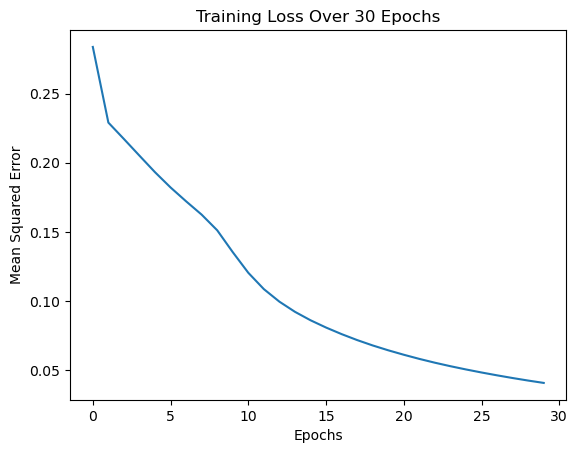

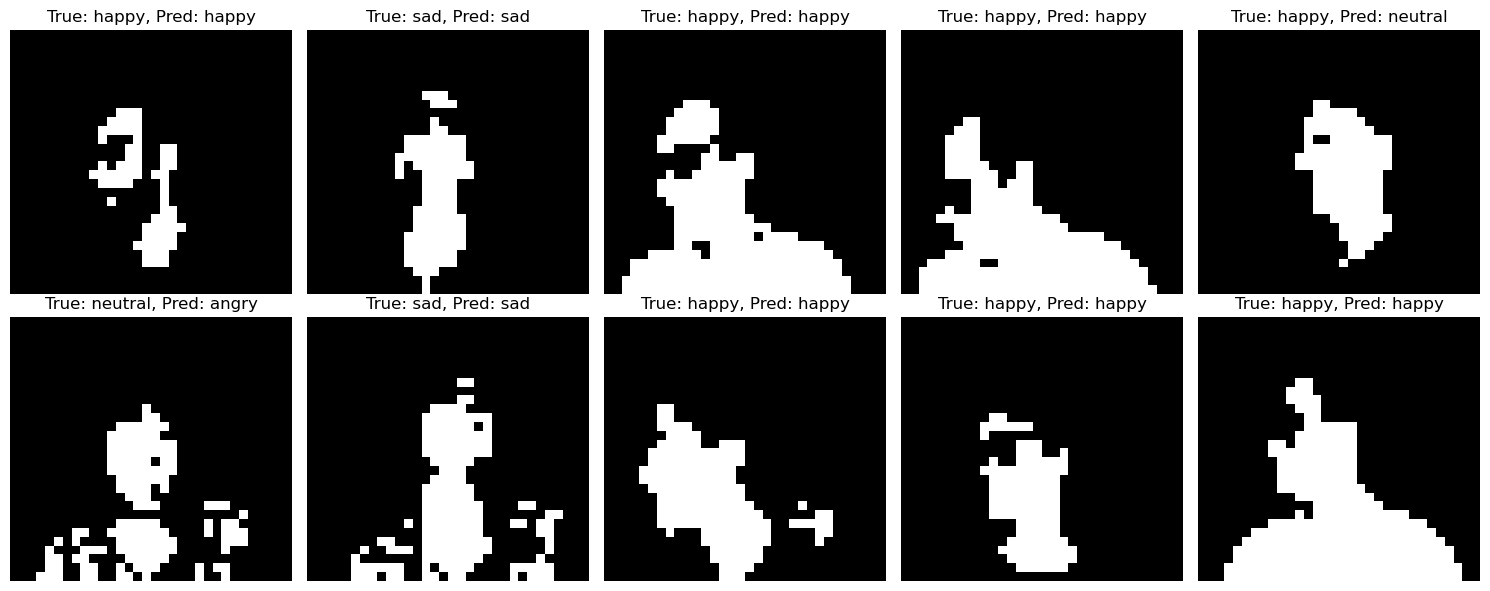

Prediction: [0.01373779 0.98836308 0.02505395 0.00477352]
True Label: [0. 1. 0. 0.]
MSE: 0.13734647740420472
Classification Error: 30.40%


In [280]:
# Initialize a new instance of the NeuralNetwork class
nn2 = NeuralNetwork(input_size=960, hidden_sizes=[100, 100], output_size=4)

# Train the neural network for 10 epochs
nn2.train(train_X, train_y, epochs=30, lr=0.01)

# Visualize the training loss over epochs
plt.plot(nn2.errors)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss Over 30 Epochs')
plt.show()

# Select a random item from the test set
random_index = random.randint(0, len(test_X) - 1)
random_input = test_X[random_index].reshape(-1, 1)
random_label = test_y[random_index].reshape(-1, 1)

# Make a prediction
random_prediction = nn2.forward(random_input)

# Calculate the MSE
prediction_mse = nn2.mse(random_label, random_prediction)

# Visualize 10 random items from the test set
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for ax in axes:
    random_index = random.randint(0, len(test_X) - 1)
    random_input = test_X[random_index].reshape(-1, 1)
    random_label = test_y[random_index].reshape(-1, 1)
    random_prediction = nn2.forward(random_input)
    
    true_label = np.argmax(random_label)
    predicted_label = np.argmax(random_prediction)
    
    true_label_str = encoder_expression.inverse_transform([true_label])[0]
    predicted_label_str = encoder_expression.inverse_transform([predicted_label])[0]
    
    ax.imshow(random_input.reshape(HEIGHT, WIDTH), cmap='gray')
    ax.set_title(f"True: {true_label_str}, Pred: {predicted_label_str}")
    ax.axis('off')

plt.tight_layout()
plt.show()

print(f"Prediction: {random_prediction.flatten()}")
print(f"True Label: {random_label.flatten()}")
print(f"MSE: {prediction_mse}")

# Calculate the classification error on the test set
test_predictions = np.array([nn2.forward(x.reshape(-1, 1)).flatten() for x in test_X])
error = classification_error(test_y, test_predictions)

print(f"Classification Error: {error * 100:.2f}%")

### 40 Epochs Results

Perfect — With more epochs, the classification error is much lower. Our model predicted 30.40% of the cases correctly! That is extremely impressive for reading facial expressions! Let's try generating over less epochs.

## Predicting Pose

Intuitively, it seems the model would likely do a better job of predicting the pose of the (low-quality) images than the expression — the pose tends to change many more pixels. Let's see if this theory is correct. We'll conduct our experiment with 20 epochs.

Epoch 10/50, Loss: 0.005756580501229349
Epoch 20/50, Loss: 0.004832620433565312
Epoch 30/50, Loss: 0.004126303273284541
Epoch 40/50, Loss: 0.003680449905836079
Epoch 50/50, Loss: 0.0033822657791229556


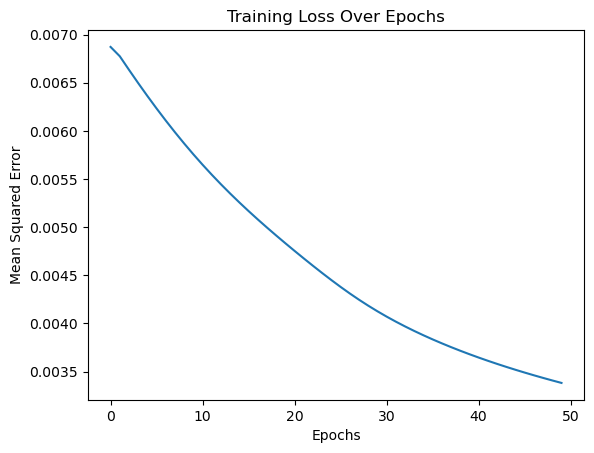

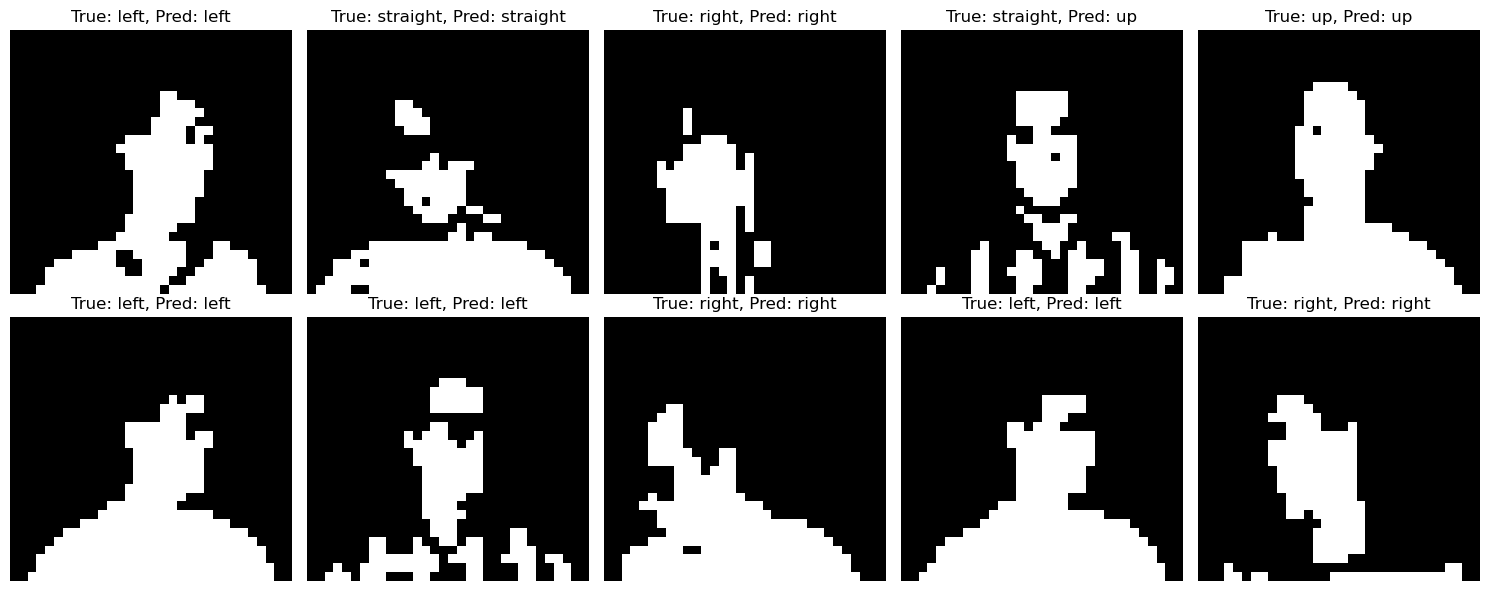

Prediction: [6.20429298e-05 9.82692947e-01 8.44259735e-02 2.48701830e-03]
True Label: [0. 1. 0. 0.]
MSE: 0.01349736319219573
Classification Error: 7.20%


In [281]:
# Train the neural network
nn3.train(train_X, train_y, epochs=50, lr=0.01)

# Visualize the training loss over epochs
plt.plot(nn3.errors)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss Over Epochs')
plt.show()

# Select a random item from the test set
random_index = random.randint(0, len(test_X) - 1)
random_input = test_X[random_index].reshape(-1, 1)
random_label = test_y[random_index].reshape(-1, 1)

# Make a prediction
random_prediction = nn3.forward(random_input)

# Calculate the MSE
prediction_mse = nn3.mse(random_label, random_prediction)

# Visualize 10 random items from the test set
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for ax in axes:
    random_index = random.randint(0, len(test_X) - 1)
    random_input = test_X[random_index].reshape(-1, 1)
    random_label = test_y[random_index].reshape(-1, 1)
    random_prediction = nn3.forward(random_input)
    
    true_label = np.argmax(random_label)
    predicted_label = np.argmax(random_prediction)
    
    true_label_str = encoder_pose.inverse_transform([true_label])[0]
    predicted_label_str = encoder_pose.inverse_transform([predicted_label])[0]
    
    ax.imshow(random_input.reshape(HEIGHT, WIDTH), cmap='gray')
    ax.set_title(f"True: {true_label_str}, Pred: {predicted_label_str}")
    ax.axis('off')

plt.tight_layout()
plt.show()

print(f"Prediction: {random_prediction.flatten()}")
print(f"True Label: {random_label.flatten()}")
print(f"MSE: {prediction_mse}")

# Calculate the classification error on the test set
test_predictions = np.array([nn3.forward(x.reshape(-1, 1)).flatten() for x in test_X])
error = classification_error(test_y, test_predictions)

print(f"Classification Error: {error * 100:.2f}%")



#### **Spectacular!** 
Our neural net learned how to predict the data to $\approx 93\%$ accuracy with just 20 epochs! 